# Retrying some Regression

## Instructions

In the lesson, you used a subset of the pumpkin data. Now, go back to the original data and try to use all of it, cleaned and standardized, to build a Logistic Regression model.


In [10]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [11]:
# load dataset
pumpkins = pd.read_csv('US-pumpkins.csv')
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [12]:
pumpkins.shape

(1757, 26)

In [16]:
pumpkins.columns

Index(['City Name', 'Type', 'Package', 'Variety', 'Sub Variety', 'Grade',
       'Date', 'Low Price', 'High Price', 'Mostly Low', 'Mostly High',
       'Origin', 'Origin District', 'Item Size', 'Color', 'Environment',
       'Unit of Sale', 'Quality', 'Condition', 'Appearance', 'Storage', 'Crop',
       'Repack', 'Trans Mode', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [19]:
pumpkins.isnull().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

I have to resort to selecting columns and dropping nulls as the null values are high in most of the columns. In addition, if I call dropna() on the pumpkins dataframe, all the values will go.

In [20]:
new_columns = ['Color','Origin','Item Size','Variety','City Name','Package','Repack','Mostly Low','Mostly High']
new_pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns],axis=1)
new_pumpkins.dropna(inplace=True)
cat_columns = ['Color','Origin','Item Size','Variety','City Name','Package','Repack']
label_encoder = LabelEncoder()
for col in cat_columns:
    new_pumpkins[col] = label_encoder.fit_transform(new_pumpkins[col])
    
new_pumpkins.dropna(inplace=True)
new_pumpkins.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 946 entries, 2 to 1624
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City Name    946 non-null    int64  
 1   Package      946 non-null    int64  
 2   Variety      946 non-null    int64  
 3   Mostly Low   946 non-null    float64
 4   Mostly High  946 non-null    float64
 5   Origin       946 non-null    int64  
 6   Item Size    946 non-null    int64  
 7   Color        946 non-null    int64  
 8   Repack       946 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 73.9 KB


# Visualizing

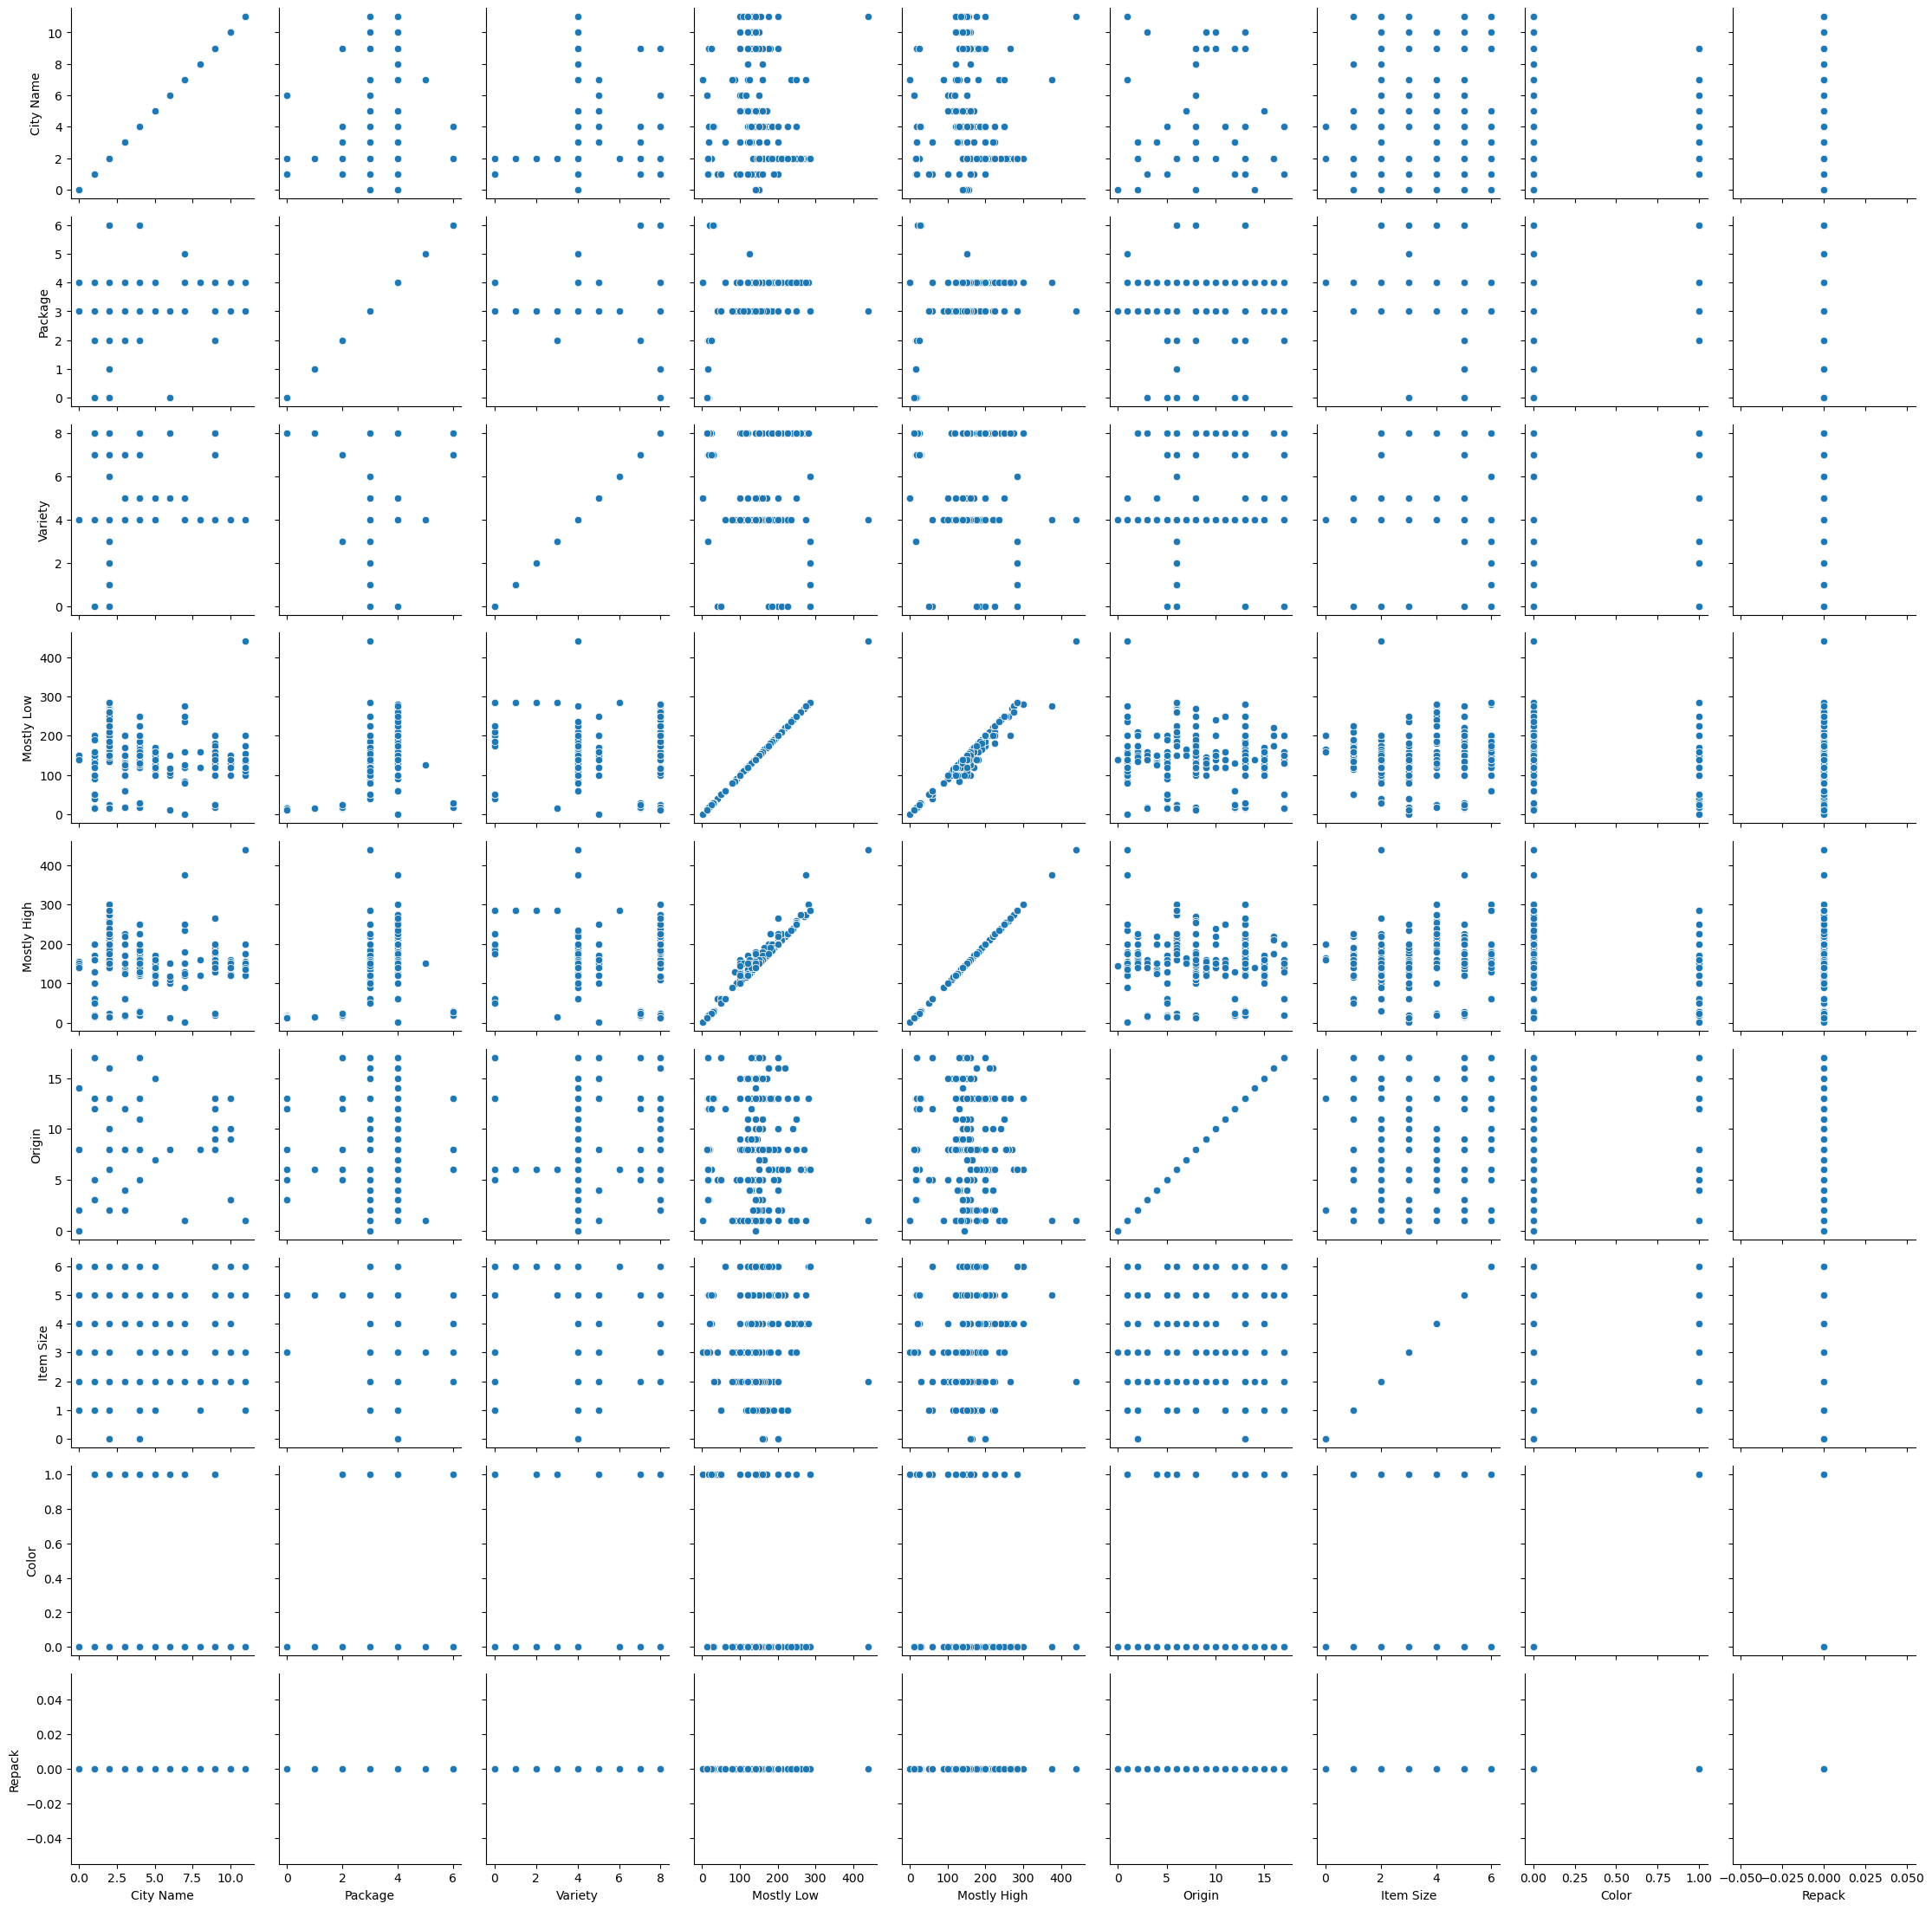

In [22]:
g = sns.PairGrid(new_pumpkins)
g.map(sns.scatterplot)

# Model Building


In [21]:
new_pumpkins.head()

,City Name,Package,Variety,Mostly Low,Mostly High,Origin,Item Size,Color,Repack
2,1,3,4,160.0,160.0,3,3,0,0
3,1,3,4,160.0,160.0,17,3,0,0
4,1,3,4,90.0,100.0,5,2,0,0
5,1,3,4,90.0,100.0,5,2,0,0
6,1,4,4,160.0,170.0,5,3,0,0


In [23]:
selected_features = ['Origin','Item Size','Variety','City Name','Package','Mostly High','Mostly Low','Repack']
X = new_pumpkins[selected_features]
y = new_pumpkins['Color']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

Next, training the model

In [24]:
model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

print(f'Classification report: \n {classification_report(y_test,predictions)}')
print(f'Predicted labels: {predictions}')
print(f'Accurary: {accuracy_score(y_test,predictions):3.3}')


Classification report: 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       170
           1       0.00      0.00      0.00        20

    accuracy                           0.87       190
   macro avg       0.45      0.49      0.46       190
weighted avg       0.80      0.87      0.83       190

Predicted labels: [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
Accurary: 0.868


/home/lukmanaliyu/miniconda3/envs/arewads/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Awesome, model accuracy is about 87%, way to go!

Confusion Matrix

In [25]:
confusion_matrix(y_test,predictions)

array([[165,   5],
       [ 20,   0]])

ROC curve visualization

<AxesSubplot: >

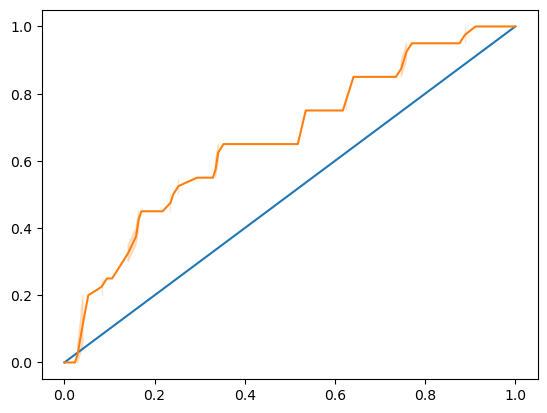

In [26]:
y_scores = model.predict_proba(X_test)
# calculate the roc curve
fpr,tpr,thresholds = roc_curve(y_test,y_scores[:,1])
sns.lineplot(x=[0,1],y =[0,1])
sns.lineplot(x =fpr,y= tpr)

ROC AUC SCORE

In [27]:
auc = roc_auc_score(y_test,y_scores[:,1])
print(auc)

0.6655882352941176


This is lower than that gotten in the lesson's model. I wanted a higher one.

So model did well, but it looks like it has difficulty actually differentiating between the categories based on the roc_auc_score